<a href="https://colab.research.google.com/github/Bilalkhan863/CODSOFT/blob/main/codsoft_internship_task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 03 : Iris Flower Classification**
- The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.
- Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.
[Dataset for iris flower classification](https://www.kaggle.com/datasets/arshid/iris-flower-dataset)

**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as p
import seaborn as sns
import pandas as pd
sns.set(style='darkgrid')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

import warnings
warnings.filterwarnings("ignore")


In [ ]:
def checking_overfitting_underfitting(y_train, y_train_pred, y_test, y_test_pred):

  training_accuracy = accuracy_score(y_train, y_train_pred)
  testing_accuracy = accuracy_score(y_test, y_test_pred)

  if training_accuracy <= 0.65:
    print("Model is underfitting")
  elif training_accuracy > 0.65 and abs(training_accuracy - testing_accuracy)> 0.15:
    print('Model is overfitting')
  else:
    print("Model is not underfitting/overfitting.")


def calculate_classification_metrices(y_true, y_pred, algorithm):

  accuracy = round(accuracy_score(y_true, y_pred), 3)
  precision = round(precision_score(y_true, y_pred, average='weighted'), 3)
  recall = round(recall_score(y_true, y_pred, average="weighted"), 3)
  f1 = round(f1_score(y_true, y_pred, average='weighted'), 3)

  print('Algorithm: ', algorithm)
  print()
  print('Accuracy: ', accuracy)
  print('Precision: ', precision)
  print('Recall: ', recall)
  print('F1 score: ', f1)
  print()

  cm = confusion_matrix(y_true, y_pred)
  labels = ['Overcast', 'Clear', 'Foggy']
  p.figure(figsize=(10, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=labels, yticklabels=labels)
  p.title('Confuion Matrix')
  p.xlabel('Predicted')
  p.ylabel('Actual')

  p.show()
  return accuracy, precision, recall, f1






In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
# Example path to a file in Google Drive
file_path = '/content/drive/My Drive/Codsoft_intership_dataset_colab_notebooks/Task 03/IRIS.csv'


Mounted at /content/drive


**Read Dataset**

In [ ]:
df = pd.read_csv(file_path, encoding='latin-1')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Data Cleaning**

In [ ]:
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

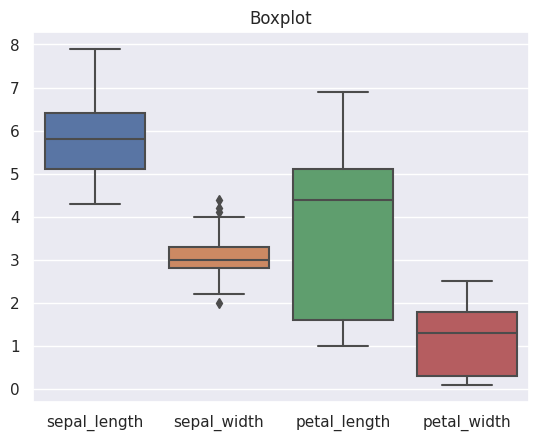

In [ ]:
sns.boxplot(data=df)
p.title('Boxplot')
p.show()

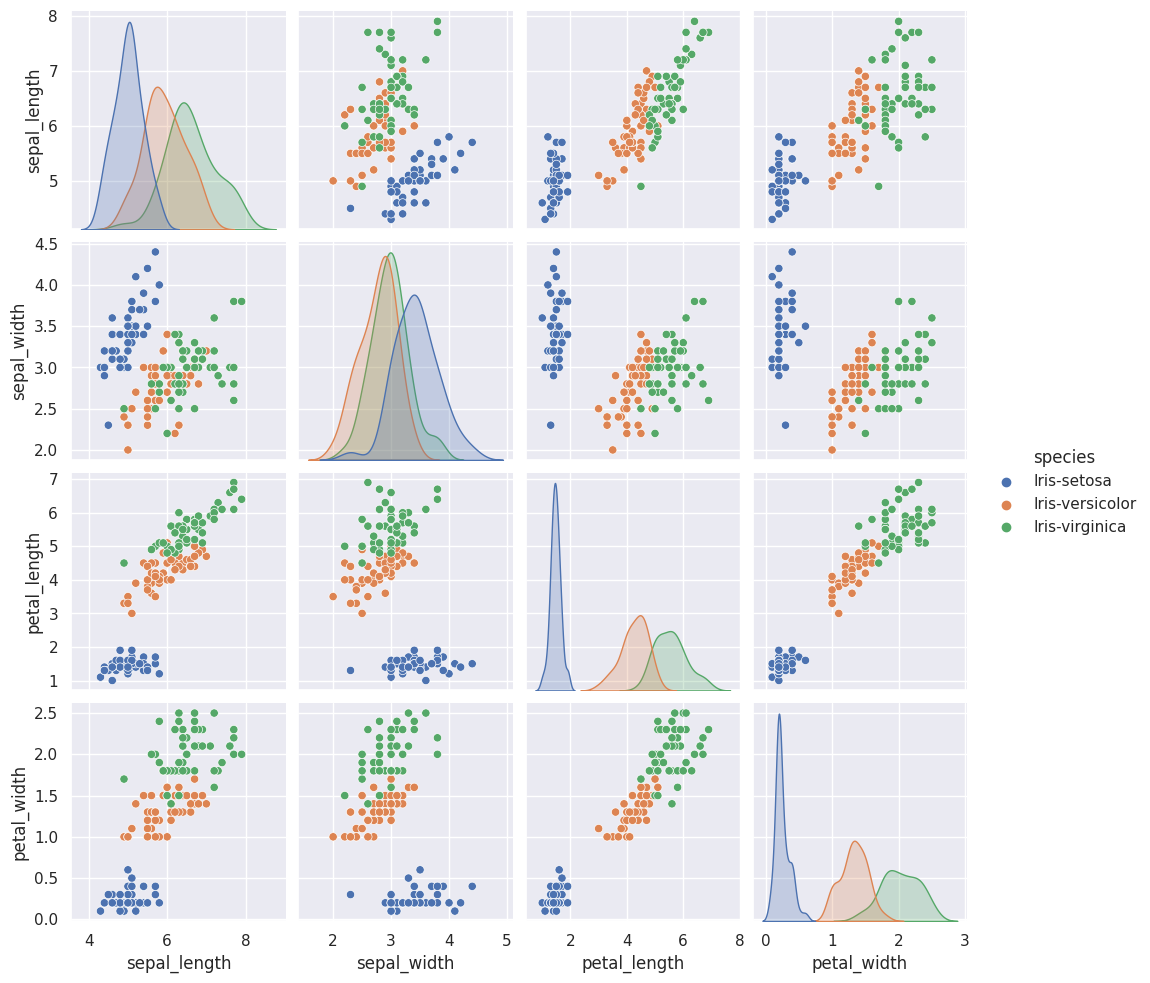

In [ ]:
sns.pairplot(df, hue='species')

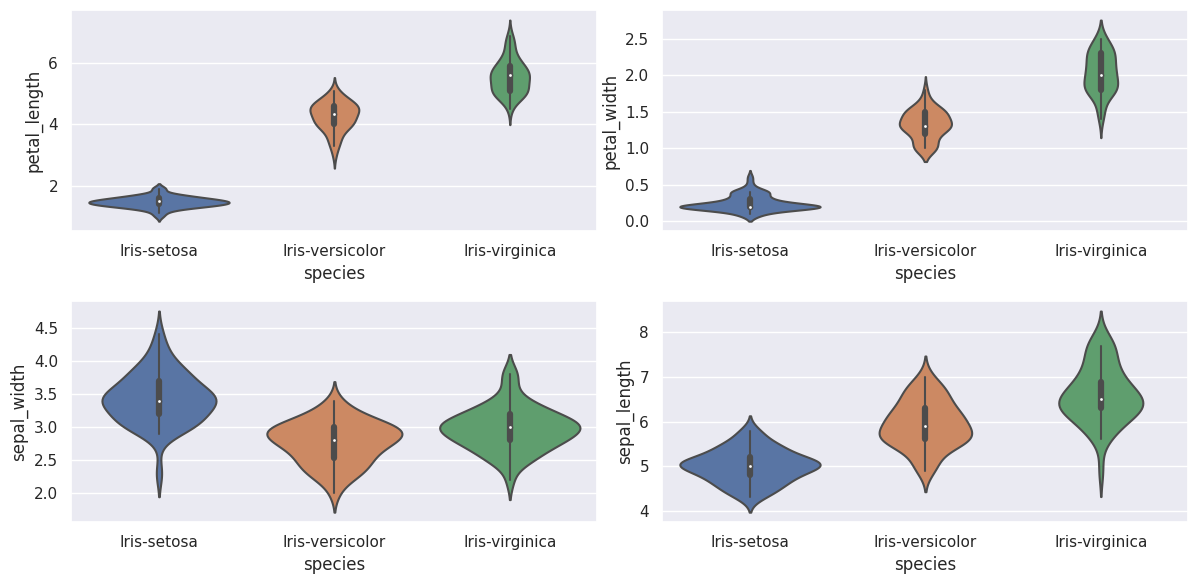

In [ ]:
p.figure(figsize=(12, 6))
p.subplot(2, 2, 1)
sns.violinplot(x='species', y='petal_length', data=df)
p.subplot(2, 2, 2)
sns.violinplot(x='species', y='petal_width', data=df)
p.subplot(2, 2, 3)
sns.violinplot(x='species', y='sepal_width', data=df)
p.subplot(2, 2, 4)
sns.violinplot(x='species', y='sepal_length', data=df)
p.tight_layout()

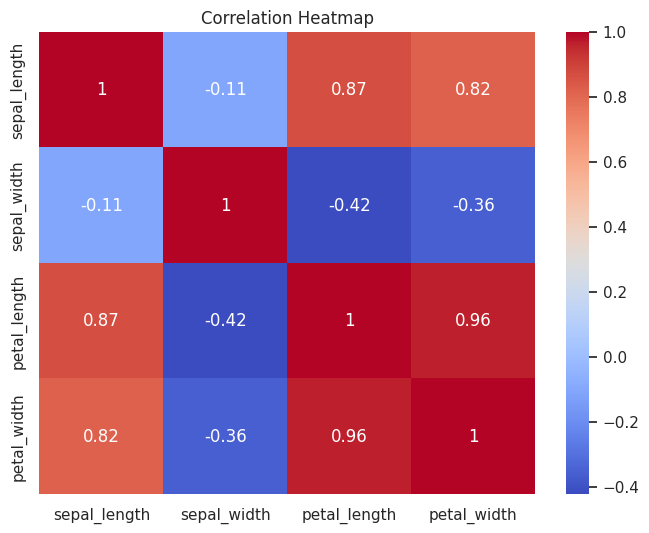

In [ ]:
data = df.copy()
data.drop('species', axis=1, inplace=True)
correlation = df.corr()
p.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
p.title('Correlation Heatmap')
p.show()

In [ ]:
input_df = df.drop(columns='species', axis=1).values

**Label Encoding**

In [ ]:
encoder = LabelEncoder()
y = df['species']
y = encoder.fit_transform(y)
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
for class_label, class_number in class_mapping.items():
  print(f"Class '{class_label} is labelled as {class_number}")

Class 'Iris-setosa is labelled as 0
Class 'Iris-versicolor is labelled as 1
Class 'Iris-virginica is labelled as 2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_df, y, test_size=0.20, random_state=42)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
joblib.dump(scaler, 'Scaler.pk1')

['Scaler.pk1']

In [ ]:
parameters = {'solver': ['liblinear', 'saga'],
              'multi_class': ['ovr', 'multinomial'],
              'C': [0.001, 0.01, 10.0],
              'penalty':['l1','l2']}
model_lr = LogisticRegression(n_jobs=-1)
models_lr = GridSearchCV(estimator=model_lr, param_grid=parameters, cv=4)
models_lr.fit(x_train, y_train)
best_parameters = models_lr.best_params_
print("Best Hyperparameters:", best_parameters)
print()

best_model_lr = models_lr.best_estimator_
y_pred_lr = best_model_lr.predict(x_train)

y_pred_lr_new = best_model_lr.predict(x_test)
checking_overfitting_underfitting(y_train, y_pred_lr, y_test, y_pred_lr_new)

Best Hyperparameters: {'C': 10.0, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}

Model is not underfitting/overfitting.


Testing Performance
Algorithm:  Logistic Regression

Accuracy:  0.967
Precision:  0.97
Recall:  0.967
F1 score:  0.967



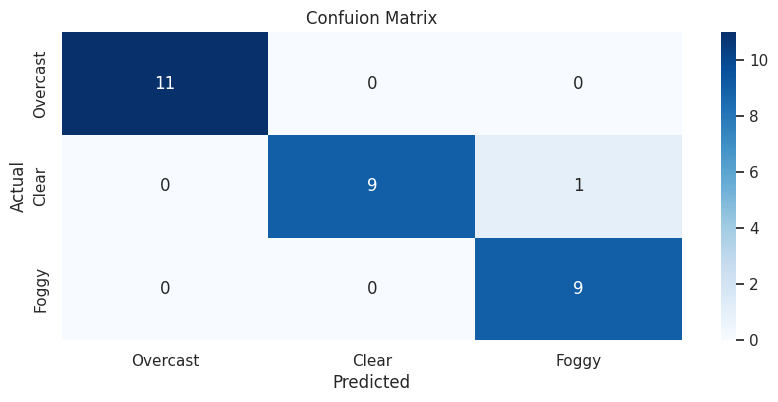

In [ ]:
print("Testing Performance")
accuracy_lr, precision_lr, recall_lr, f1_lr = calculate_classification_metrices(y_test, y_pred_lr_new, "Logistic Regression")

In [ ]:
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [None, 5, 10],
              'min_samples_split': [None, 2, 5],
              'splitter':['best', 'random']}
model_dt = DecisionTreeClassifier()
models_dt = GridSearchCV(estimator=model_dt, param_grid=parameters, cv=4)
models_dt.fit(x_train, y_train)
best_parameters = models_dt.best_params_
print('Best Hypermeters: ', best_parameters)
print()
best_model_dt = models_dt.best_estimator_
y_pred_dt = best_model_dt.predict(x_train)
y_pred_dt_new = best_model_dt.predict(x_test)
checking_overfitting_underfitting(y_train, y_pred_dt, y_test, y_pred_dt_new)


Best Hypermeters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5, 'splitter': 'random'}

Model is not underfitting/overfitting.


Testing Performance
Algorithm:  Decision Tree

Accuracy:  0.867
Precision:  0.874
Recall:  0.867
F1 score:  0.864



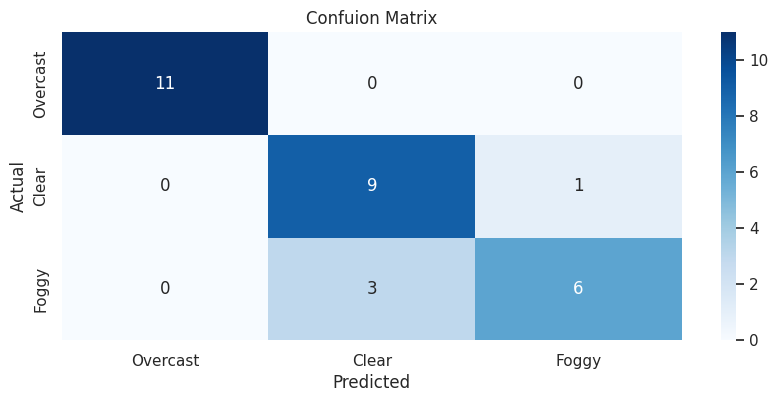

In [ ]:
print('Testing Performance')
accuracy_dt, precision_dt, recall_dt, f1_dt = calculate_classification_metrices(y_test,
                                                                                y_pred_dt_new,
                                                                                'Decision Tree')

In [ ]:

parameters = {'max_depth': [None, 5],
              'class_weight' : [None, 'balanced'],
              'min_samples_split': [None, 2, 5],
              'criterion': ['gini', 'log_loss', 'entropy']}
model_et = ExtraTreesClassifier()
models_et = GridSearchCV(estimator=model_et, param_grid=parameters, cv=4)
models_et.fit(x_train, y_train)
best_parameters = models_et.best_params_
print('Best Hyperparameters:', best_parameters)
print()
best_model_et = models_et.best_estimator_
y_pred_et = best_model_et.predict(x_train)
y_pred_et_new = best_model_et.predict(x_test)
checking_overfitting_underfitting(y_train, y_pred_et, y_test, y_pred_et_new)


Best Hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}

Model is not underfitting/overfitting.


Testing Performance
Algorithm:  Extra Trees

Accuracy:  0.933
Precision:  0.933
Recall:  0.933
F1 score:  0.933



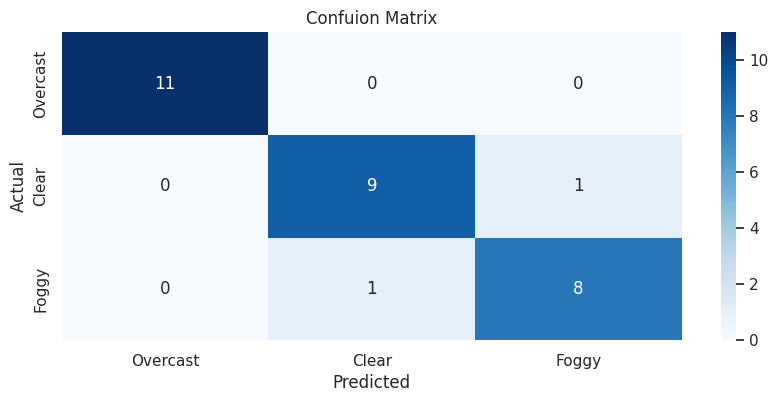

In [ ]:
print('Testing Performance')
accuracy_et, precision_et, recall_et, f1_et = calculate_classification_metrices(y_test, y_pred_et_new, 'Extra Trees')

Insights:
- Logistic Regression perform **better** than random foresct classifier and Extra tree classifier